In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ordre de grandeur

## Albédo tuile

http://www.ecohabitation.com/actualite/nouvelles/toits-blancs-alternative-diminuer-changements-climatiques#_ftn1

absorption   0.64


https://dumas.ccsd.cnrs.fr/dumas-00469805/document

page 116

albédo  0.33  - 0.36



## Convection

convection libre   (air)  h=    5 - 25    W/m2/K

In [3]:
0.6/25*600

14.4

https://fr.wikipedia.org/wiki/Air


http://www.legi.grenoble-inp.fr/people/Philippe.Marty/cours-convection-M2.pdf

In [156]:
k = 0.0262 # W/m/K, conductivité thermique
nu = 1.57e-5 #  m2·s−1 , viscosité cinématique air,
alpha = 2.22e-5 # m2·s−1, diffusivité thermique
Pr = 0.708 # Prandl

In [157]:
L = 4 # m, dimension caractéristique
U = 20e3/60/60 # m/s, vitesse caractéristique
print( U )

5.555555555555555


In [158]:
Re = U*L/nu # Reynolds,   turbulent si >3.10^5
print( Re )

1415428.1670205237


In [159]:
Reynolds = lambda u: u*L/nu

In [160]:
# Limite turbulence

v_lim = 3e5/L*nu
print( 'vitesse limite turbulence: %f m/s '% v_lim )

vitesse limite turbulence: 1.177500 m/s 


In [161]:
# Forcée, turbulent, Pr < 50  (cf. page 15)
h_FT = lambda u : k/L * 0.036 *  Reynolds(u)**(4/5) * Pr**(1/3) 

# Forcée laminaire
h_FL = lambda u : k/L * 0.664 * Reynolds(u)**(1/2) * Pr**(1/3) 

In [171]:
u_span_T = np.linspace( 1.0, 15, 20 ) # m/sh_FT_span = h_FT( u_span )
u_span_L = np.linspace( 0, 1.7, 20 )

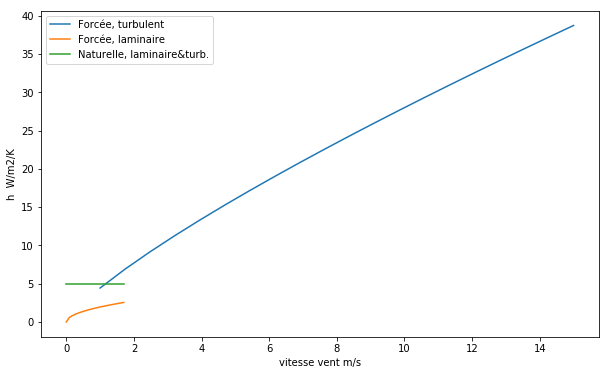

In [174]:
plt.figure( figsize=(10, 6) )
plt.plot( u_span_T, h_FT( u_span_T ), label='Forcée, turbulent' )
plt.plot( u_span_L, h_FL( u_span_L ), label='Forcée, laminaire' )
plt.plot( [0, 1.7], [5, 5], label='Naturelle, laminaire&turb.' )

# plt.plot( u_span_T, 6.5*u_span_T, label='Forcée, laMétéo-dec' )

plt.xlabel( 'vitesse vent m/s' )
plt.ylabel( 'h  W/m2/K' );
plt.legend();

### Convection naturelle

In [98]:
theta = 37*np.pi/180

In [136]:
deltaT = 30
L = 4 # m

In [145]:
g = 9.81 #* np.cos(theta) #m/s-2
beta = 3e-3 # air, 20°C 

In [146]:
Gr = g*beta*deltaT*L**3/nu**2
print('Grashof: %e'% Gr )
print('Rayleight: %e'% (Gr*Pr) )

Grashof: 2.865512e+07
Rayleight: 2.028782e+07


In [148]:
# Plaque horizontale chauffant vers le haut
h_NTh = k/L * 0.14*(Gr*Pr)**(1/3)
print( h_NTh )


# Vertical, turbulent (Mac Adams)
h_NTv = k/L * 0.13 * (Gr*Pr)**(1/3)

print( h_NTv )

5.002009169886503
4.644722800608895


Si taille de tuile comme dim carac:

In [149]:
L = 20e-2 # m

In [150]:
Gr = g*beta*deltaT*L**3/nu**2
print('Grashof: %e'% Gr )
print('Rayleight: %e'% (Gr*Pr) )

Grashof: 2.865512e+07
Rayleight: 2.028782e+07


In [154]:
# limite de turbulence ...
# vertical :
h_NLv = k/L * 0.677* (Pr)**(1/2)/(0.95+Pr)**(1/4)*Gr**(1/4)

print( h_NLv )


# horizontale :
h_NLh = k/L * 0.54* (Pr*Gr)**(1/4)

print( h_NLh )

4.811505774877057
4.74759779703654


# Isolation toiture

laine de verre
http://www.toutsurlisolation.com/Choisir-son-isolant/Les-isolants/Isolants-en-laine-minerale/Laine-de-verre

sigma = 0.030W/(m.k.) à 0.040W/(m.k)


In [6]:
ep = 20e-2 # m
h = 0.035*ep

print( h )

0.007000000000000001
